In [2]:
from neuron import *
from encodingsource import *
from hsgs import *
from classical_neuron import *
from classical_pso import *
from sf import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from qiskit import IBMQ
# IBMQ.delete_account()
# IBMQ.save_account('')
IBMQ.load_account()
# my_provider.backends()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
my_provider = IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
def compareAll(testSet=None, runLocal=False, backend='ibmq_qasm_simulator'):
    
    my_provider = IBMQ.get_provider()
    simulator  = my_provider.get_backend(backend)
    
    if runLocal:
        simulator = Aer.get_backend('qasm_simulator')
        print("Using local qasm_simulator", "testSet size:", len(testSet))
    else: print("Using backend:", backend, "testSet size:", len(testSet))
    
    classicalResult = []
    hsgsResult = []
    encodingWeightResult = []
    
    for i in range(len(testSet)):
        
        print(i, end = '')
        
        (inputVector, weightVector) = testSet[i]

        # Classico
        resultadoClassico = runClassicalNeuronReturnProbability(inputVector, weightVector)
        classicalResult.append(resultadoClassico)

        # HSGS
        operator = "hsgs"
        neuron = createNeuron(inputVector, weightVector, operator)
#         print(neuron)
        resultadoHSGS = executeNeuron(neuron, simulator, threshold=None)
        hsgsResult.append(resultadoHSGS)

        # encoding-weight
        operator = "encoding-weight"
        neuron = createNeuron( inputVector, weightVector, operator)
        resultadoEncoding = executeNeuron(neuron, simulator, threshold=None)
        encodingWeightResult.append(resultadoEncoding)
    
    return [classicalResult, hsgsResult, encodingWeightResult]


In [5]:
testSet = [([-1, 1, -1, 1, 1, 1, 1, 1], [1, -1, 1, -1, -1, -1, -1, -1]),
           ([-1, 1, 1, 1, 1, 1, -1, -1], [1, -1, 1, 1, 1, -1, -1, -1]),
           ([1, -1, 1, -1, -1, -1, -1, -1], [1, -1, 1, -1, 1, -1, -1, -1]),
           ([1, 1, -1, -1, -1, -1, -1, 1], [1, 1, -1, -1, -1, -1, 1, -1])]
testSet

[([-1, 1, -1, 1, 1, 1, 1, 1], [1, -1, 1, -1, -1, -1, -1, -1]),
 ([-1, 1, 1, 1, 1, 1, -1, -1], [1, -1, 1, 1, 1, -1, -1, -1]),
 ([1, -1, 1, -1, -1, -1, -1, -1], [1, -1, 1, -1, 1, -1, -1, -1]),
 ([1, 1, -1, -1, -1, -1, -1, 1], [1, 1, -1, -1, -1, -1, 1, -1])]

In [9]:
athensResult = compareAll(testSet=testSet,
                        runLocal=False,
                        backend='ibmq_athens')
athensResult

Using backend: ibmq_athens testSet size: 4
0123

[[0.9999999999999998,
  0.06249999999999997,
  0.5624999999999998,
  0.2499999999999999],
 [0.2613525390625, 0.3045654296875, 0.2919921875, 0.3243408203125],
 [0.3140869140625, 0.357177734375, 0.3372802734375, 0.3497314453125]]

In [10]:
simulatorResult = compareAll(testSet=testSet,
                             runLocal=False,
                             backend='ibmq_qasm_simulator')
simulatorResult

Using backend: ibmq_qasm_simulator testSet size: 4
0123

[[0.9999999999999998,
  0.06249999999999997,
  0.5624999999999998,
  0.2499999999999999],
 [1.0, 0.0626220703125, 0.5670166015625, 0.2506103515625],
 [1.0, 0.0623779296875, 0.5653076171875, 0.2447509765625]]

In [8]:
simulatorResult = [[0.9999999999999998,
  0.06249999999999997,
  0.5624999999999998,
  0.2499999999999999],
 [1.0, 0.0626220703125, 0.5670166015625, 0.2506103515625],
 [1.0, 0.0623779296875, 0.5653076171875, 0.2447509765625]]

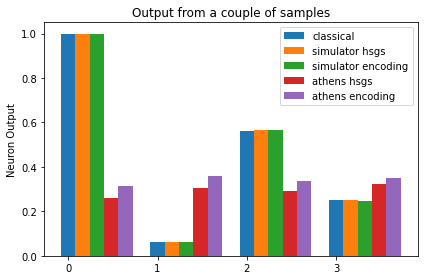

In [11]:
classical = simulatorResult[0]
encodingSimulator = simulatorResult[2]
encodingReal = athensResult[2]
hsgsSimulator = simulatorResult[1]
hsgsReal = athensResult[1]

# encodingValencia = valenciaResult[2]
# hsgsValencia = valenciaResult[1]
# encodingOurense = ourenseResult[2]
# hsgsOurense = ourenseResult[1]

x = np.arange(len(classical))  # the label locations
width = 0.16  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(len(classical))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
# r6 = [x + width for x in r5]
# r7 = [x + width for x in r6]
# r8 = [x + width for x in r7]
# r9 = [x + width for x in r8]

fig, ax = plt.subplots()

rects1 = ax.bar(r1, classical, width, label='classical')

rects2 = ax.bar(r2, hsgsSimulator, width, label='simulator hsgs')
rects3 = ax.bar(r3, encodingSimulator, width, label='simulator encoding')

rects4 = ax.bar(r4, hsgsReal, width, label='athens hsgs')
rects5 = ax.bar(r5, encodingReal, width, label='athens encoding')

# rects6 = ax.bar(r6, hsgsValencia, width, label='valencia hsgs')
# rects7 = ax.bar(r7, encodingValencia, width, label='valencia encoding')

# rects8 = ax.bar(r8, hsgsOurense, width, label='ourense hsgs')
# rects9 = ax.bar(r9, encodingOurense, width, label='ourense encoding')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neuron Output')
ax.set_title('Output from a couple of samples')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()

In [6]:
melbourneResult = compareAll(testSet=testSet,
                             runLocal=False,
                             backend='ibmq_16_melbourne')
melbourneResult

Using backend: ibmq_16_melbourne testSet size: 4
0123

[[0.9999999999999998,
  0.06249999999999997,
  0.5624999999999998,
  0.2499999999999999],
 [0.44287109375, 0.2867431640625, 0.32958984375, 0.420166015625],
 [0.2762451171875, 0.33251953125, 0.4627685546875, 0.46142578125]]

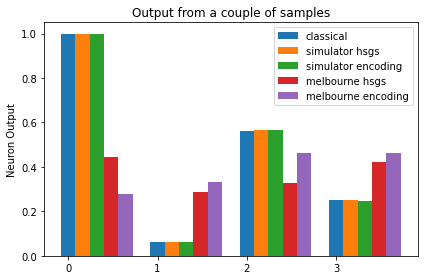

In [9]:
classical = simulatorResult[0]
encodingSimulator = simulatorResult[2]
encodingReal = melbourneResult[2]
hsgsSimulator = simulatorResult[1]
hsgsReal = melbourneResult[1]

# encodingValencia = valenciaResult[2]
# hsgsValencia = valenciaResult[1]
# encodingOurense = ourenseResult[2]
# hsgsOurense = ourenseResult[1]

x = np.arange(len(classical))  # the label locations
width = 0.16  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(len(classical))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
r4 = [x + width for x in r3]
r5 = [x + width for x in r4]
# r6 = [x + width for x in r5]
# r7 = [x + width for x in r6]
# r8 = [x + width for x in r7]
# r9 = [x + width for x in r8]

fig, ax = plt.subplots()

rects1 = ax.bar(r1, classical, width, label='classical')

rects2 = ax.bar(r2, hsgsSimulator, width, label='simulator hsgs')
rects3 = ax.bar(r3, encodingSimulator, width, label='simulator encoding')

rects4 = ax.bar(r4, hsgsReal, width, label='melbourne hsgs')
rects5 = ax.bar(r5, encodingReal, width, label='melbourne encoding')

# rects6 = ax.bar(r6, hsgsValencia, width, label='valencia hsgs')
# rects7 = ax.bar(r7, encodingValencia, width, label='valencia encoding')

# rects8 = ax.bar(r8, hsgsOurense, width, label='ourense hsgs')
# rects9 = ax.bar(r9, encodingOurense, width, label='ourense encoding')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Neuron Output')
ax.set_title('Output from a couple of samples')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()